In [1]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    balanced_accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
experimentPath = r"D:\\crixodia\\Repositories\\\DQN-DDQN\\\Experiments\\"
experimentName = "u306-gtr-nltr-lr5-ed4-tsm3"
experimentPath = experimentPath + f"{experimentName}\\{experimentName}.csv"
df = pd.read_csv(experimentPath)

In [3]:
def custom_report(y, pred):
    return {
        "Accuracy": accuracy_score(y, pred),
        "Balanced Accuracy": balanced_accuracy_score(y, pred),
        "Precision": precision_score(y, pred, average=None), # "macro"
        "Recall": recall_score(y, pred, average=None), # "macro"
        "F1": f1_score(y, pred, average=None),  # "macro"
    }

In [4]:
y = df["actual_class"]
allAccs = dict()
allbAccs = dict()
allCfs = dict()

yDQNpred = df["dqn_predicted_class"]
yDDQNpred = df["ddqn_predicted_class"]

yPostDQNpred = df["post_dqn_predicted_class"]
yPostDDQNpred = df["post_ddqn_predicted_class"]

ccrDQN = custom_report(y, yDQNpred)
allAccs["DQN (noGesture)"] = ccrDQN["Accuracy"]
allbAccs["DQN (noGesture)"] = ccrDQN["Balanced Accuracy"]
allCfs["DQN (noGesture)"] = confusion_matrix(y, yDQNpred, normalize="true")

ccrDDQN = custom_report(y, yDDQNpred)
allAccs["DDQN (noGesture)"] = ccrDDQN["Accuracy"]
allbAccs["DDQN (noGesture)"] = ccrDDQN["Balanced Accuracy"]
allCfs["DDQN (noGesture)"] = confusion_matrix(y, yDDQNpred, normalize="true")

ccrPostDQN = custom_report(y, yPostDQNpred)
allAccs["PostDQN (noGesture)"] = ccrPostDQN["Accuracy"]
allbAccs["PostDQN (noGesture)"] = ccrPostDQN["Balanced Accuracy"]
allCfs["PostDQN (noGesture)"] = confusion_matrix(y, yPostDQNpred, normalize="true")

ccrPostDDQN = custom_report(y, yPostDDQNpred)
allAccs["PostDDQN (noGesture)"] = ccrPostDDQN["Accuracy"]
allbAccs["PostDDQN (noGesture)"] = ccrPostDDQN["Balanced Accuracy"]
allCfs["PostDDQN (noGesture)"] = confusion_matrix(y, yPostDDQNpred, normalize="true")

In [5]:
df = df[~df["ActualGesture"].isin([6])]
df = df[~df["predDDQN"].isin([6])]
df = df[~df["dqn_predicted_class"].isin([6])]
df = df[~df["postDDQN"].isin([6])]
df = df[~df["postDQN"].isin([6])]

yng = df["actual_class"]

yDQNpredng = df["predDQN"]
yDDQNpredng = df["predDDQN"]

yPostDQNpredng = df["postDQN"]
yPostDDQNpredng = df["postDDQN"]

ccrDQNng = custom_report(yng, yDQNpredng)
allAccs["DQN"] = ccrDQNng["Accuracy"]
allbAccs["DQN"] = ccrDQNng["Balanced Accuracy"]
allCfs["DQN"] = confusion_matrix(yng, yDQNpredng, normalize="true")

ccrDDQNng = custom_report(yng, yDDQNpredng)
allAccs["DDQN"] = ccrDDQNng["Accuracy"]
allbAccs["DDQN"] = ccrDDQNng["Balanced Accuracy"]
allCfs["DDQN"] = confusion_matrix(yng, yDDQNpredng, normalize="true")

ccrPostDQNng = custom_report(yng, yPostDQNpredng)
allAccs["PostDQN"] = ccrPostDQNng["Accuracy"]
allbAccs["PostDQN"] = ccrPostDQNng["Balanced Accuracy"]
allCfs["PostDQN"] = confusion_matrix(yng, yPostDQNpredng, normalize="true")

ccrPostDDQNng = custom_report(yng, yPostDDQNpredng)
allAccs["PostDDQN"] = ccrPostDDQNng["Accuracy"]
allbAccs["PostDDQN"] = ccrPostDDQNng["Balanced Accuracy"]
allCfs["PostDDQN"] = confusion_matrix(yng, yPostDDQNpredng, normalize="true")

KeyError: 'ActualGesture'

In [ ]:
def plot_cf(cf, labels, title=""):
    df_cm = pd.DataFrame(
        cf, index=[i for i in labels.values()], columns=[i for i in labels.values()]
    )

    fig = plt.figure(figsize=(5, 3))

    heatmap = sns.heatmap(df_cm, annot=True, fmt=".2f", cmap="Blues")
    heatmap.yaxis.set_ticklabels(
        heatmap.yaxis.get_ticklabels(), rotation=0, ha="right", fontsize=10
    )
    heatmap.xaxis.set_ticklabels(
        heatmap.xaxis.get_ticklabels(), rotation=45, ha="right", fontsize=10
    )

    plt.ylabel("Actual value")
    plt.xlabel("Predicted value")
    plt.title(title)
    plt.savefig(experimentPath.replace(".csv", title + ".png"), bbox_inches="tight")


def plot_accs(accs, baccs, title=""):
    colors = ["skyblue"] * len(accs)
    fig, ax = plt.subplots(figsize=(8, 5))

    bars = ax.barh(
        list(accs.keys()), list(accs.values()), color=colors, label="Accuracy"
    )

    for bar in bars:
        plt.text(
            bar.get_width() + 0.01,
            bar.get_y() + bar.get_height() / 2,
            f"{bar.get_width():.2f}",
            ha="center",
            va="center",
        )

    plt.plot(
        list(baccs.values()),
        list(baccs.keys()),
        "r--",
        label="Balanced Accuracy",
        linewidth=2,
    )

    plt.legend(bbox_to_anchor=(0.5, 1.15), loc="upper center", ncol=2)
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.xlabel("Accuracy")
    plt.title(title)
    plt.savefig(experimentPath.replace(".csv", title + ".png"), bbox_inches="tight")


def plot_episode_rewards(dataframe):
    dqn_avg_reward = dataframe["DQNEpisodeReward"].rolling(window=150).mean()
    ddqn_avg_reward = dataframe["DDQNEpisodeReward"].rolling(window=150).mean()

    sns.set(style="whitegrid")
    sns.axes_style("ticks")

    plt.figure(figsize=(6, 3))

    # sns.lineplot(x='EpisodeIndex', y='DQNEpisodeReward', data=dataframe, label='DQN Episode Reward', alpha=0.5)
    sns.lineplot(
        x="EpisodeIndex",
        y=dqn_avg_reward,
        data=dataframe,
        label="DQN Average Reward (Window=150)",
    )

    # sns.lineplot(x='EpisodeIndex', y='DDQNEpisodeReward', data=dataframe, label='DDQN Episode Reward', alpha=0.5)
    sns.lineplot(
        x="EpisodeIndex",
        y=ddqn_avg_reward,
        data=dataframe,
        label="DDQN Average Reward (Window=150)",
    )

    plt.xlabel("Episode")
    plt.ylabel("Average Reward")
    plt.title("DQN and DDQN Average Rewards")

    plt.legend()
    plt.savefig(experimentPath.replace(".csv", "rewards.png"), bbox_inches="tight")

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


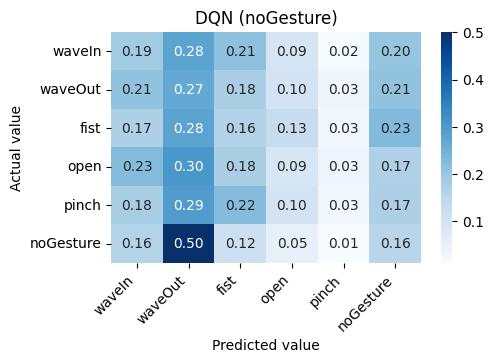

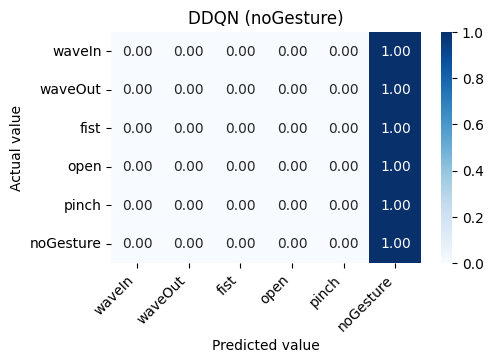

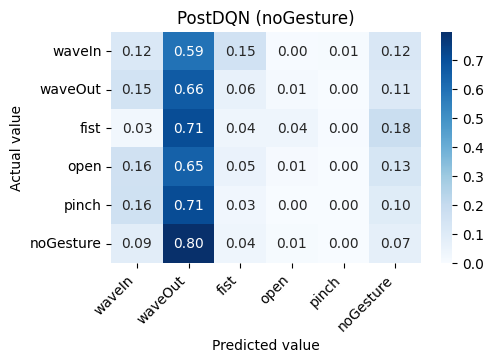

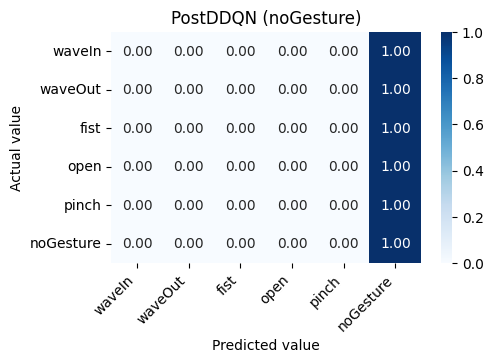

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


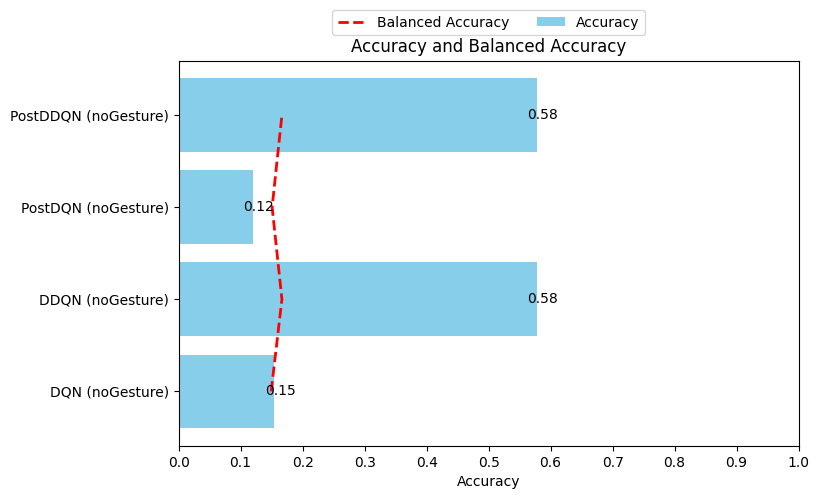

In [ ]:
for k, cf in allCfs.items():
    labels = {
        1: "waveIn",
        2: "waveOut",
        3: "fist",
        4: "open",
        5: "pinch",
        6: "noGesture",
    }
    if len(cf) == 5:
        labels = {0: "waveIn", 1: "waveOut", 2: "fist", 3: "open", 4: "pinch"}
    try:
        plot_cf(cf, labels, k)
    except:
        pass

plot_accs(allAccs, allbAccs, "Accuracy and Balanced Accuracy")

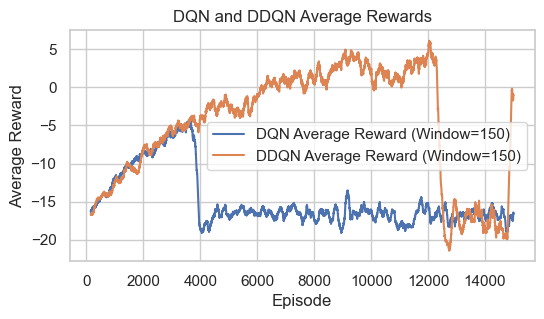

In [ ]:
dftp = pd.read_csv(experimentPath.replace(".csv", "-tp.csv"))
plot_episode_rewards(dftp)